In [2]:
import pandas as pd
import numpy as np

In [4]:
movie= pd.read_csv('IMDB Dataset.csv')

In [5]:
movie.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
movie.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
movie.drop_duplicates(keep='first', inplace=True)

In [11]:
movie.shape

(49582, 2)

In [12]:
#split feature and target
feature= movie.review
target=movie.sentiment

In [13]:
#encoding Target
lables= {
    'negative':0, 'positive':1
}

target= target.replace(lables).to_numpy()

C:\Users\pkhad\AppData\Local\Temp\ipykernel_17728\2792830067.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target= target.replace(lables).to_numpy()


In [14]:
target

array([1, 1, 1, ..., 0, 0, 0], shape=(49582,))

In [35]:
#!pip install nltk


In [51]:
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')  # optional but recommended for WordNet lemmatizer


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pkhad\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pkhad\AppData\Roaming\nltk_data...


True

## text processsing

In [68]:
import re
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
eng_stopwords= stopwords.words('english')

In [53]:
lemmatizer=WordNetLemmatizer()

In [54]:
def text_processor(text):
    text=text.lower()

    #urls (http,https...)
    text = re.sub(r"(http|https)\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,6}(/\S*)?","",text)
    #html tags
    text= re.sub(r"<.*?>","",text)
    #punctuation and specail chars
    text= re.sub(r'[^\w\d\s]','',text)
    #stopwords
    text= text.strip()
    text=[word for word in text.split() if word not in eng_stopwords]
    text= " ".join(text)
    #lemmatizer
    text= lemmatizer.lemmatize(text)
                 
    return text

In [55]:
text_processor('movie link is https://hssie.con')

'movie link'

In [56]:
text_processor('<p>thsi is what !</p>')

'thsi'

In [60]:
cleaned_feature= feature.apply(text_processor)

In [61]:
cleaned_feature[0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

In [64]:
#visualization
#!pip install wordCloud


In [70]:
from wordcloud import WordCloud

In [71]:
pos_review = cleaned_feature[target==1]

In [72]:
wordcloud = WordCloud(
    colormap='winter',
    background_color='black',
    width=800,
    height=800
)


image= wordcloud.generate(''.join(pos_review))

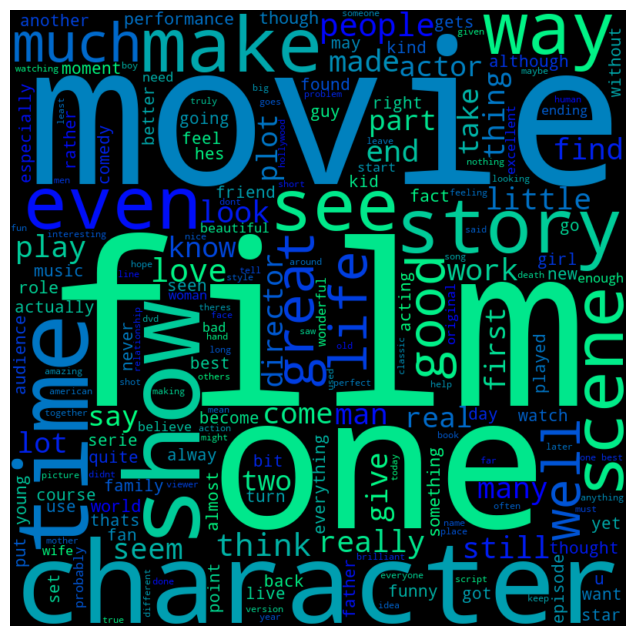

In [73]:
# plot
plt.figure(figsize=(8, 8))
plt.imshow(image, interpolation='bilinear')
plt.axis("off")
plt.show()

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [92]:
# %pip install --upgrade pip setuptools wheel


In [95]:
python3.11 -m venv nlp_env


SyntaxError: invalid syntax (2635756701.py, line 1)

In [94]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


ModuleNotFoundError: No module named 'gensim'

In [93]:
!pip install gensim



Defaulting to user installation because normal site-packages is not writeable
  Using cached gensim-4.3.3.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [21 lines of output]
  + C:\Program Files\Python313\python.exe C:\Users\pkhad\AppData\Local\Temp\pip-install-k134mh52\numpy_883f4389f9c14d7ba75e4af1a6c49f31\vendored-meson\meson\meson.py setup C:\Users\pkhad\AppData\Local\Temp\pip-install-k134mh52\numpy_883f4389f9c14d7ba75e4af1a6c49f31 C:\Users\pkhad\AppData\Local\Temp\pip-install-k134mh52\numpy_883f4389f9c14d7ba75e4af1a6c49f31\.mesonpy-zypqelgl -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\pkhad\AppData\Local\Temp\pip-install-k134mh52\numpy_883f4389f9c14d7ba75e4af1a6c49f31\.mesonpy-zypqelgl\meson-python-native-file.ini
  The Meson build system
  Version: 1.2.99
  Source dir: C:\Users\pkhad\AppData\Local\Temp\pip-install-k134mh52\numpy_883f4389f9c14d7ba75e4af1a6c49f31
  Build dir: C:\Users\pkhad\AppData\Local\Temp\pip-install-k134mh52\numpy_883f4389f9c14d7ba75e4af1a6c49f31\.mesonpy

In [76]:
tfidf= TfidfVectorizer()

In [77]:
X= tfidf.fit_transform(cleaned_feature)

In [78]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4940073 stored elements and shape (49582, 221783)>

In [ ]:
w2v_model = Word2Vec(sentences=train_tokens,

                     vector_size=100,

                     window=5,

                     min_count=2,

                     workers=4)
 
# ----------------------

# 4. Convert reviews to vectors

# ----------------------

def vectorize(tokens, model):

    vectors = [model.wv[word] for word in tokens if word in model.wv]

    if len(vectors) == 0:

        return np.zeros(model.vector_size)

    return np.mean(vectors, axis=0)

X= np.array(
    [vectorize(tokens, w2v_model) for tokens in train_tokens]
)
 

In [85]:
#split train test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_w2v, target, test_size=0.2, stratify=target, shuffle=True, random_state=999
)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
log_reg= LogisticRegression
log_reg.fit(X_train,y_train)